# Customer Segmentation Analysis Using K-means Clustering

## 1. Importing Required Libraries

In this project, we'll use several Python libraries for data manipulation, visualization, and machine learning:
- **numpy**: For numerical operations and array manipulation
- **pandas**: For data handling and analysis
- **matplotlib & seaborn**: For creating visualizations
- **scikit-learn**: For implementing our machine learning models

Let's start by importing these libraries:

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

## 2. Data Generation and Loading

In real-world scenarios, customer data is usually collected from various sources like:
- Purchase histories
- Customer surveys
- Loyalty programs
- Website interactions

For this project, we'll create synthetic data that mirrors real customer behavior patterns. Our dataset includes:
- Customer ages (18-70 years)
- Annual income ($15k-$100k)
- Spending scores (1-100)

In [3]:
def load_mall_data():
    """
    Create a synthetic mall customer dataset similar to real-world scenarios
    Returns:
        pandas DataFrame with customer features
    """
    # Generate synthetic data
    n_samples = 200

    # Generate age data (18-70 years)
    age = np.random.randint(18, 70, n_samples)

    # Generate annual income data ($15k-$100k)
    income = np.random.randint(15000, 100000, n_samples)

    # Generate spending score data (1-100)
    spending = np.random.randint(1, 100, n_samples)

    # Create DataFrame
    df = pd.DataFrame({
        'Age': age,
        'Annual_Income': income,
        'Spending_Score': spending
    })

    return df

## 3. Data Preprocessing

Before applying our clustering algorithm, we need to prepare our data:
1. Check for missing values
2. Scale our features
3. Handle any outliers

Why is scaling important?
- Income values are in thousands ($15k-$100k)
- Age values are much smaller (18-70)
- Spending scores are on a different scale (1-100)

Scaling ensures all features contribute equally to our clustering model.

In [4]:
def preprocess_data(df):
    """
    Preprocess the data by handling missing values and scaling features
    Args:
        df: Input DataFrame
    Returns:
        scaled_features: Scaled feature matrix
        scaler: Fitted StandardScaler object
    """
    # Check for missing values
    print("\nMissing values in the dataset:")
    print(df.isnull().sum())

    # Select features for clustering
    features = ['Age', 'Annual_Income', 'Spending_Score']

    # Scale the features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(df[features])

    return scaled_features, scaler

## 4. Exploratory Data Analysis (EDA)

Now that we have our data, let's understand it better through visualizations and statistical analysis. We'll look at:
- Distribution of customer ages
- Income patterns
- Spending behavior
- Relationships between variables

The plots below will help us identify any patterns or anomalies in our customer data.

In [5]:
def perform_eda(df):
    """
    Perform Exploratory Data Analysis
    Args:
        df: Input DataFrame
    """
    # Basic statistical summary
    print("\nBasic statistical summary:")
    print(df.describe())

    # Create distribution plots
    plt.figure(figsize=(15, 5))

    # Age distribution
    plt.subplot(1, 3, 1)
    sns.histplot(data=df, x='Age', bins=20)
    plt.title('Age Distribution')

    # Income distribution
    plt.subplot(1, 3, 2)
    sns.histplot(data=df, x='Annual_Income', bins=20)
    plt.title('Annual Income Distribution')

    # Spending score distribution
    plt.subplot(1, 3, 3)
    sns.histplot(data=df, x='Spending_Score', bins=20)
    plt.title('Spending Score Distribution')

    plt.tight_layout()
    plt.show()

## 5. Finding Optimal Number of Clusters

One of the most important decisions in clustering is choosing the right number of segments. We'll use two methods:

1. **Elbow Method**:
   - Plots the within-cluster sum of squares (WCSS) vs. number of clusters
   - Look for the "elbow" point where adding more clusters gives diminishing returns

2. **Silhouette Analysis**:
   - Measures how similar objects are to their own cluster compared to other clusters
   - Higher scores indicate better-defined clusters

In [6]:
def find_optimal_clusters(scaled_features, max_clusters=10):
    """
    Find optimal number of clusters using elbow method and silhouette score
    Args:
        scaled_features: Scaled feature matrix
        max_clusters: Maximum number of clusters to try
    Returns:
        optimal_clusters: Optimal number of clusters
    """
    inertias = []
    silhouette_scores = []

    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(scaled_features)
        inertias.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

    # Plot elbow curve
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(range(2, max_clusters + 1), inertias, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')

    plt.subplot(1, 2, 2)
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Analysis')

    plt.tight_layout()
    plt.show()

    # Return optimal number of clusters based on silhouette score
    return silhouette_scores.index(max(silhouette_scores)) + 2

## 6. Building the K-means Model

With our optimal number of clusters determined, we'll:
1. Initialize the K-means model
2. Fit it to our scaled data
3. Assign cluster labels to each customer
4. Visualize the results

## 7. Results Visualization

Our scatter plots will show:
- Customer segments in different colors
- How segments differ by age, income, and spending
- Clear boundaries between customer groups

Let's analyze what each axis and color represents.

## 8. Understanding Customer Segments

Based on our analysis, we can identify several distinct customer segments:

1. **High-Value Enthusiasts**
   - High income
   - High spending score
   - Primary targets for luxury products

2. **Conservative High-Income**
   - High income
   - Lower spending score
   - Potential for targeted marketing

3. **Average Consumers**
   - Medium income
   - Medium spending score
   - Balanced shopping behavior

4. **Careful Spenders**
   - Lower income
   - Low spending score
   - Value-seeking behavior

5. **Risk Segment**
   - Lower income
   - High spending score
   - May need financial advice


In [7]:
def build_and_evaluate_model(scaled_features, n_clusters, scaler, df):
    """
    Build KMeans model and evaluate results
    Args:
        scaled_features: Scaled feature matrix
        n_clusters: Number of clusters to use
        scaler: Fitted StandardScaler object
        df: Original DataFrame
    Returns:
        df_with_clusters: DataFrame with cluster assignments
    """
    # Train KMeans model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)

    # Add cluster labels to original dataframe
    df_with_clusters = df.copy()
    df_with_clusters['Cluster'] = cluster_labels

    # Visualize clusters
    plt.figure(figsize=(12, 5))

    # Plot Income vs Spending Score
    plt.subplot(1, 2, 1)
    sns.scatterplot(data=df_with_clusters,
                   x='Annual_Income',
                   y='Spending_Score',
                   hue='Cluster',
                   palette='deep')
    plt.title('Income vs Spending Score by Cluster')

    # Plot Age vs Spending Score
    plt.subplot(1, 2, 2)
    sns.scatterplot(data=df_with_clusters,
                   x='Age',
                   y='Spending_Score',
                   hue='Cluster',
                   palette='deep')
    plt.title('Age vs Spending Score by Cluster')

    plt.tight_layout()
    plt.show()

    # Print cluster characteristics
    print("\nCluster Characteristics:")
    print(df_with_clusters.groupby('Cluster').mean().round(2))

    return df_with_clusters


## 7. Results Visualization

Our scatter plots will show:
- Customer segments in different colors
- How segments differ by age, income, and spending
- Clear boundaries between customer groups

Let's analyze what each axis and color represents.

Starting Customer Segmentation Analysis...

Dataset shape: (200, 3)

Basic statistical summary:
             Age  Annual_Income  Spending_Score
count  200.00000     200.000000      200.000000
mean    43.42500   55589.495000       50.320000
std     14.94191   24393.930013       29.538113
min     18.00000   15301.000000        1.000000
25%     31.00000   34070.250000       23.000000
50%     43.50000   58250.000000       52.000000
75%     56.00000   75806.500000       75.250000
max     69.00000   99896.000000       99.000000


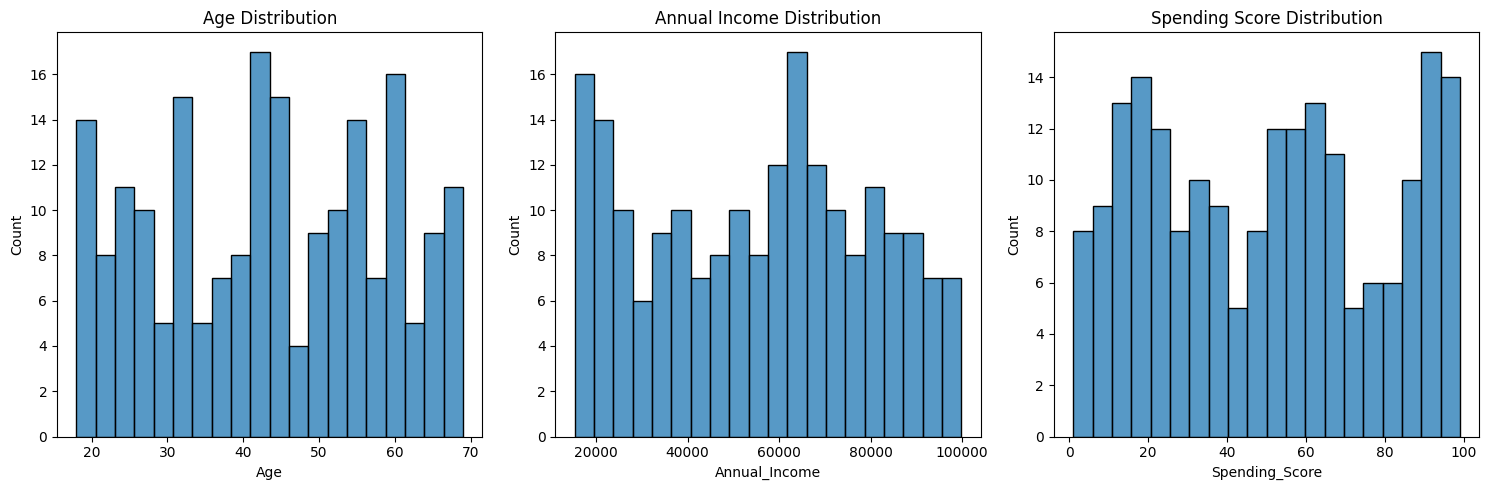


Missing values in the dataset:
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64


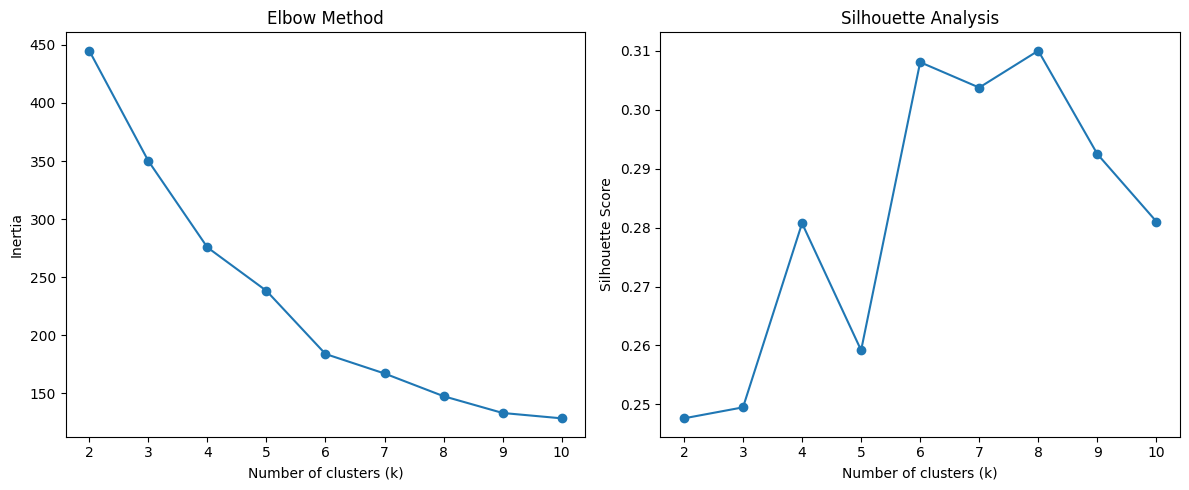


Optimal number of clusters: 8


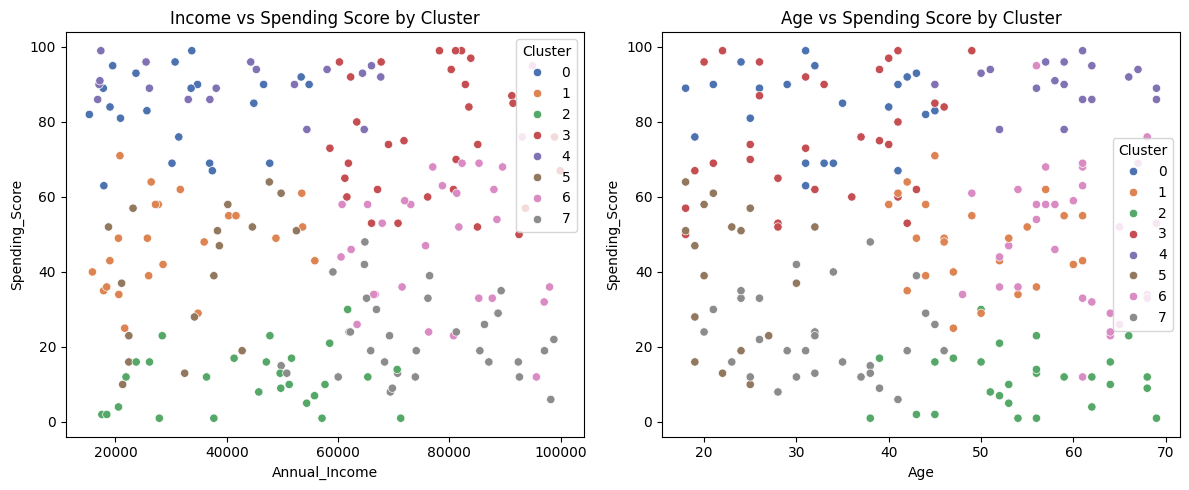


Cluster Characteristics:
           Age  Annual_Income  Spending_Score
Cluster                                      
0        32.62       32175.00           83.38
1        49.75       31420.88           48.00
2        54.74       44253.37           11.22
3        32.58       77070.48           75.81
4        59.06       41389.39           90.11
5        22.71       34576.47           39.88
6        59.65       79197.03           48.77
7        32.90       74715.48           22.45

Analysis completed successfully!


In [8]:
def main():
    """
    Main function to orchestrate the customer segmentation analysis
    """
    print("Starting Customer Segmentation Analysis...")

    # Load data
    df = load_mall_data()
    print("\nDataset shape:", df.shape)

    # Perform EDA
    perform_eda(df)

    # Preprocess data
    scaled_features, scaler = preprocess_data(df)

    # Find optimal number of clusters
    optimal_clusters = find_optimal_clusters(scaled_features)
    print(f"\nOptimal number of clusters: {optimal_clusters}")

    # Build and evaluate model
    df_with_clusters = build_and_evaluate_model(scaled_features, optimal_clusters, scaler, df)

    print("\nAnalysis completed successfully!")

    return df_with_clusters

if __name__ == "__main__":
    final_df = main()

## 9. Business Recommendations

### Marketing Strategies:
1. **High-Value Enthusiasts**
   - Premium product offerings
   - Exclusive event invitations
   - VIP services

2. **Conservative High-Income**
   - Value proposition marketing
   - Quality-focused messaging
   - Premium product trials

3. **Average Consumers**
   - Balanced promotions
   - Mid-range product focus
   - Loyalty programs

4. **Careful Spenders**
   - Discount promotions
   - Value bundle offerings
   - Budget-friendly options

5. **Risk Segment**
   - Targeted budgeting tools
   - Financial planning services
   - Responsible spending programs

## 10. Model Evaluation Metrics

Our clustering model's performance can be assessed through:
1. Silhouette Score: Measures cluster cohesion
2. Within-cluster sum of squares: Measures cluster tightness
3. Between-cluster sum of squares: Measures cluster separation

## 11. Future Improvements

To enhance this analysis, consider:

1. **Additional Features**
   - Purchase frequency
   - Product category preferences
   - Seasonal buying patterns
   - Customer lifetime value

2. **Advanced Techniques**
   - Hierarchical clustering
   - DBSCAN algorithm
   - Gaussian Mixture Models
   - Time-series analysis

3. **Validation Methods**
   - Cross-validation
   - Temporal validation
   - External validation metrics

## 12. Conclusion

This customer segmentation analysis has revealed distinct customer groups with unique characteristics. These insights can help in:
1. Targeted marketing campaigns
2. Product development
3. Customer service improvement
4. Resource allocation
5. Strategic planning

Remember that customer segments may evolve over time, so regular reanalysis is recommended.